In [1]:
import pandas as pd
import ete3
import numpy as np

In [2]:
df = pd.read_csv("../phylo/bac120_taxonomy_r214.tsv", sep="\t", header=None)
df["taxonomy_genus"] = df[1].apply(lambda x: x.split(";s__")[0])

df.head()

,0,1,taxonomy_genus
0,RS_GCF_016456235.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
1,RS_GCF_023534435.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
2,RS_GCF_003172515.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
3,RS_GCF_005396125.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
4,RS_GCF_004567275.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...


In [3]:
df_hosts = pd.read_csv(
    "../crispr_search/plasmid_host_taxonomy_consolidated_all_possible_hosts_final_derep.tsv",
    sep="\t",
)

df_hosts["taxonomy_genus"] = df_hosts["host"].apply(
    lambda x: x.split(";s__")[0] if ";s__" in x else x
)
df_hosts.head()

,Plasmid,host,method,taxonomy_genus
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...


In [4]:
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)

ptus_mapping = {}
ptus["length"] = ptus[2].apply(lambda x: len(x.split(",")))

for idx in ptus.index:
    for plasmid in ptus.loc[idx, 2].split(","):
        if "IMGPR" in plasmid:
            plasmid = plasmid.split("|")[0]
        ptus_mapping[plasmid] = idx

In [5]:
df_hosts["PTU"] = df_hosts["Plasmid"].apply(
    lambda x: ptus_mapping[x] if x in ptus_mapping else np.nan
)
df_hosts["order"] = df_hosts["host"].apply(
    lambda x: x.split(";")[3].split("o__")[1] if ";o__" in x else None
)
df_hosts["phylum"] = df_hosts["host"].apply(
    lambda x: x.split(";")[1].split("p__")[1] if ";p__" in x else None
)
df_hosts["class"] = df_hosts["host"].apply(
    lambda x: x.split(";")[2].split("c__")[1] if ";c__" in x else None
)
df_hosts["family"] = df_hosts["host"].apply(
    lambda x: x.split(";")[4].split("f__")[1] if ";f__" in x else None
)
df_hosts["genus"] = df_hosts["host"].apply(
    lambda x: x.split(";")[5].split("g__")[1] if ";g__" in x else None
)
df_hosts["species"] = df_hosts["host"].apply(
    lambda x: x.split(";")[6].split("s__")[1] if ";s__" in x else None
)
df_hosts = df_hosts.dropna(subset=["PTU"])
df_hosts

,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,class,family,genus,species
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Methyloligellaceae,Methyloceanibacter,Methyloceanibacter sp003135455
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Methyloligellaceae,Methyloceanibacter,None
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,Vicinamibacteria,UBA2999,2-02-FULL-65-29,None
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,Vicinamibacteria,UBA2999,2-02-FULL-65-29,2-02-FULL-65-29 sp001767435
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Gaiellales,Actinomycetota,Thermoleophilia,Gaiellaceae,GMQP-bins7,None
...,...,...,...,...,...,...,...,...,...,...,...
398900,Refsoil_NZ_HG916853.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-15112,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium favelukesii
398901,Refsoil_NZ_HG916854.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-14282,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium favelukesii
398902,Refsoil_NZ_HG916855.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-14278,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium favelukesii
398903,Refsoil_NZ_HG938354.1,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,isolate,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03535,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Neorhizobium,Neorhizobium galegae


In [6]:
df_hosts[df_hosts["Plasmid"].str.contains("IMGPR")]

,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,class,family,genus,species
322317,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium tibeticum
322318,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium sp900466605
322319,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium sp012641395
322320,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,Rhizobium cauense
322321,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Rhizobiaceae,Rhizobium,None
...,...,...,...,...,...,...,...,...,...,...,...
386256,IMGPR_plasmid_651324105_000021,d__Bacteria;p__Actinobacteriota;c__Actinomycet...,isolate,d__Bacteria;p__Actinobacteriota;c__Actinomycet...,PTU-40774,Streptomycetales,Actinobacteriota,Actinomycetia,Streptomycetaceae,Streptomyces,Streptomyces clavuligerus
386257,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,Actinomycetia,Streptomycetaceae,Streptomyces,None
386258,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,isolate,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,Actinomycetia,Streptomycetaceae,Streptomyces,Streptomyces clavuligerus
386259,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,Actinomycetia,Streptomycetaceae,Streptomyces,Streptomyces clavuligerus


In [7]:
df_hosts["order"].nunique()

283

In [8]:
df_hosts["class"].nunique()

101

In [9]:
a = df_hosts.groupby("order")["PTU"].nunique()

a[a > 1].index

Index(['', '2-12-FULL-54-10', '20CM-2-55-15', 'AC-67', 'AKS1', 'AKYH767',
       'ATCC43930', 'Acetivibrionales', 'Acetobacterales',
       'Acidiferrobacterales',
       ...
       'UBA9219', 'UBA9655', 'UBA9968', 'VXMN01', 'Vampirovibrionales',
       'Verrucomicrobiales', 'Vicinamibacterales', 'WQYP01', 'XYA12-FULL-58-9',
       'Xanthomonadales'],
      dtype='object', name='order', length=191)

In [10]:
import polars as pl

with open("../phylo/gtdb_soil_accessions_bac.txt") as f:
    gtdb_soil_accessions = [line.strip() for line in f]
# Load and preprocess the GTDB taxa data
all_gtdb_taxa = (
    pl.read_csv(
        "../phylo/bac120_metadata_r214.tsv.gz",
        separator="\t",
        infer_schema_length=int(1e10),
    )
    .select(pl.col("accession"), pl.col("gtdb_taxonomy"))
    .filter(pl.col("accession").is_in(gtdb_soil_accessions))
    .with_columns(
        # Split the taxonomy string into fields and unnest; we'll later extract field_2 and remove "c__"
        pl.col("gtdb_taxonomy")
        .str.split(";")
        .list.to_struct(n_field_strategy="max_width")
    )
    .unnest("gtdb_taxonomy")
    .with_columns(
        # Create a new column 'class' by cleaning up field_2 (i.e. remove the prefix "c__")
        pl.col("field_2").str.replace("c__", "").alias("class")
    )
)

# Build a dictionary mapping from accession to class from the preprocessed data.
taxon_mapping = {
    row["accession"]: row["class"]
    for row in all_gtdb_taxa.select(["accession", "class"]).to_dicts()
}

# Load the tree of all classes
all_classes_tree = ete3.Tree(
    "../phylo/bac120_r214.tree", quoted_node_names=True, format=1
)

# For each leaf, get its class (if available) and build mappings.
# Ensures that each distinct class is represented only once.
accession_to_class = {}
class_to_accession = {}
for leaf in all_classes_tree.get_leaves():
    if leaf.name in taxon_mapping:
        leaf_class = taxon_mapping[leaf.name]
        accession_to_class[leaf.name] = leaf_class
        # Only record the first occurrence to ensure uniqueness.
        if leaf_class not in class_to_accession:
            class_to_accession[leaf_class] = leaf.name

# Prune the tree so that only one leaf per distinct class remains.
all_classes_tree.prune(list(class_to_accession.values()), preserve_branch_length=True)

# Rename each remaining leaf with its corresponding class name.
for leaf in all_classes_tree.get_leaves():
    # leaf.name is one of the accession values stored in class_to_accession; use that accession to look up the class.
    leaf.name = taxon_mapping[leaf.name]

all_classes_tree.write(outfile="bac120_r214_all_classes.tree")

In [18]:
len(all_classes_tree.get_leaf_names())t

119

In [ ]:
len(
    set(all_classes_tree.get_leaf_names())
    - set(df_hosts[df_hosts["host"].str.contains("d__Bacteria")]["class"].unique())
)

48

In [21]:
all_gtdb_taxa.select(pl.col("field_2")).with_columns(
    pl.col("field_2").str.replace("c__", "")
).unique()

field_2
str
"""Kapabacteria"""
"""JAJPGV01"""
"""Methylomirabil…"
"""Kiritimatielli…"
"""Synergistia"""
…
"""Syntrophobacte…"
"""Ignavibacteria…"
"""Caldisericia"""


In [14]:
df_hosts.head()

,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,class,family,genus,species
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Methyloligellaceae,Methyloceanibacter,Methyloceanibacter sp003135455
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Methyloligellaceae,Methyloceanibacter,None
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,Vicinamibacteria,UBA2999,2-02-FULL-65-29,None
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,Vicinamibacteria,UBA2999,2-02-FULL-65-29,2-02-FULL-65-29 sp001767435
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Gaiellales,Actinomycetota,Thermoleophilia,Gaiellaceae,GMQP-bins7,None


In [11]:
all_gtdb_taxa.head()

accession,field_0,field_1,field_2,field_3,field_4,field_5,field_6,class
str,str,str,str,str,str,str,str,str
"""RS_GCF_0012385…","""d__Bacteria""","""p__Bacillota""","""c__Bacilli""","""o__Bacillales""","""f__Bacillaceae…","""g__Priestia""","""s__Priestia me…","""Bacilli"""
"""RS_GCF_0004036…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…","""Actinomycetia"""
"""RS_GCF_0001788…","""d__Bacteria""","""p__Chloroflexo…","""c__Ktedonobact…","""o__Ktedonobact…","""f__Ktedonobact…","""g__Ktedonobact…","""s__Ktedonobact…","""Ktedonobacteri…"
"""RS_GCF_0012799…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…","""Actinomycetia"""
"""RS_GCF_0009818…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…","""Actinomycetia"""


In [12]:
# Let's see from all the gtdb soil (metadata description) how many of each taxonomic rank they have, and how many we have

all_gtdb_taxa2 = (
    pl.read_csv("../phylo/gtdb_soil_accessions.tsv", separator="\t")
    .with_columns(
        pl.col("gtdb_taxonomy")
        .str.split(";")
        .list.to_struct(n_field_strategy="max_width")
    )
    .unnest("gtdb_taxonomy")
)
gtdb_soil_taxa_count = {
    "species": all_gtdb_taxa2.select(pl.col("field_6")).n_unique(),
    "genus": all_gtdb_taxa2.select(pl.col("field_5")).n_unique(),
    "family": all_gtdb_taxa2.select(pl.col("field_4")).n_unique(),
    "order": all_gtdb_taxa2.select(pl.col("field_3")).n_unique(),
    "class": all_gtdb_taxa2.select(pl.col("field_2")).n_unique(),
    "phylum": all_gtdb_taxa2.select(pl.col("field_1")).n_unique(),
    "domain": all_gtdb_taxa2.select(pl.col("field_0")).n_unique(),
}
gtdb_soil_taxa_count

{'species': 7404,
 'genus': 2358,
 'family': 737,
 'order': 371,
 'class': 144,
 'phylum': 61,
 'domain': 2}

In [13]:
all_gtdb_taxa2.head()

accession,field_0,field_1,field_2,field_3,field_4,field_5,field_6
str,str,str,str,str,str,str,str
"""RS_GCF_0012385…","""d__Bacteria""","""p__Bacillota""","""c__Bacilli""","""o__Bacillales""","""f__Bacillaceae…","""g__Priestia""","""s__Priestia me…"
"""RS_GCF_0004036…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…"
"""RS_GCF_0001788…","""d__Bacteria""","""p__Chloroflexo…","""c__Ktedonobact…","""o__Ktedonobact…","""f__Ktedonobact…","""g__Ktedonobact…","""s__Ktedonobact…"
"""RS_GCF_0012799…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…"
"""RS_GCF_0009818…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Streptomyce…","""f__Streptomyce…","""g__Streptomyce…","""s__Streptomyce…"


In [14]:
# Let's check the intersections
def compare_taxa(rank, gtdb_taxa_rank):
    count = 0
    # Retrieve unique entries from the specified column and extract the second part after splitting by '_'
    gtdb_values = [
        j.split("__")[1]
        for j in all_gtdb_taxa2.get_column(gtdb_taxa_rank).unique().to_list()
    ]

    for i in df_hosts[rank].unique():
        if i in gtdb_values:
            count += 1
    return count


host_intersection = {}
for rk, gtdb_rk in zip(
    ["phylum", "class", "order", "family", "genus", "species"],
    ["field_1", "field_2", "field_3", "field_4", "field_5", "field_6"],
):
    host_intersection[rk] = compare_taxa(rk, gtdb_rk)
    host_intersection["domain"] = 2
host_intersection


{'phylum': 41,
 'domain': 2,
 'class': 77,
 'order': 198,
 'family': 373,
 'genus': 1245,
 'species': 4532}

In [15]:
df_taxa_comparison = pd.DataFrame(
    {
        "GTDB_taxa": pd.Series(gtdb_soil_taxa_count),
        "intersection": pd.Series(host_intersection),
    }
)
df_taxa_comparison


,GTDB_taxa,intersection
class,144,77
domain,2,2
family,737,373
genus,2358,1245
order,371,198
phylum,61,41
species,7404,4532


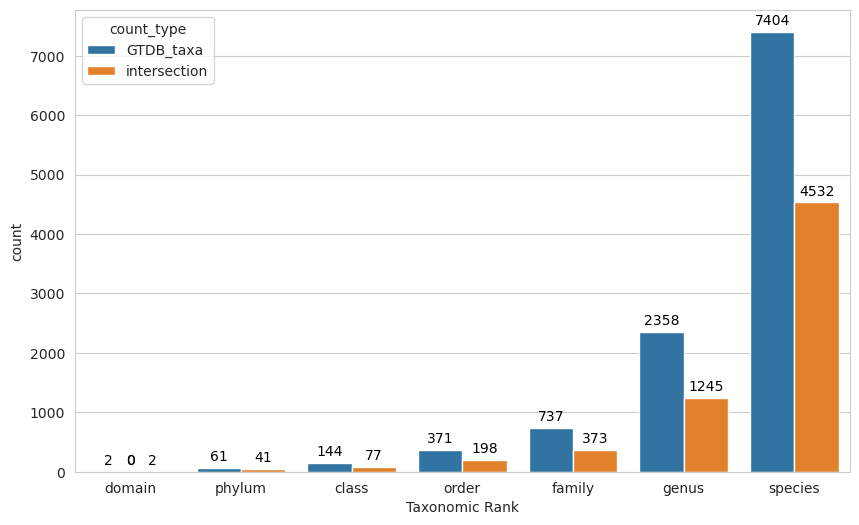

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
# Convert the index to a column so that taxonomic rank becomes an explicit column
df_plot = df_taxa_comparison.reset_index().rename(columns={"index": "taxonomic_rank"})

# Define the taxonomic order we wish to follow
taxonomic_order = ["domain", "phylum", "class", "order", "family", "genus", "species"]

# Reshape the DataFrame to long format so we can plot both columns as side-by-side bars
df_melted = df_plot.melt(
    id_vars="taxonomic_rank",
    value_vars=["GTDB_taxa", "intersection"],
    var_name="count_type",
    value_name="count",
)

# Ensure the taxonomic_rank is sorted in the desired order
df_melted["taxonomic_rank"] = pd.Categorical(
    df_melted["taxonomic_rank"], categories=taxonomic_order, ordered=True
)
df_melted = df_melted.sort_values("taxonomic_rank")

# Create the barplot with seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x="taxonomic_rank",
    y="count",
    hue="count_type",
    order=taxonomic_order,
    ax=ax,
)
ax.set_xlabel("Taxonomic Rank")

# Add values on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{int(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

fig.savefig("../figures/gtdb_taxa_intersection.pdf", bbox_inches="tight")


In [17]:
df_hosts["species"].unique()

array(['Methyloceanibacter sp003135455', None,
       '2-02-FULL-65-29 sp001767435', ..., 'Campylobacter_D coli',
       'Rubrobacter radiotolerans', 'Borrelia turicatae'], dtype=object)

In [18]:
gtdb_taxa_again = (
    pl.read_csv(
        "../phylo/bac120_metadata_r214.tsv.gz",
        separator="\t",
        infer_schema_length=int(1e10),
    )
    .select(pl.col("accession"), pl.col("gtdb_taxonomy"))
    .with_columns(
        pl.col("gtdb_taxonomy")
        .str.split(";")
        .list.to_struct(n_field_strategy="max_width")
    )
    .unnest("gtdb_taxonomy")
    .with_columns(species_fix=pl.col("field_6").str.replace("s__", ""))
).with_columns(is_in_our_soil=pl.col("species_fix").is_in(df_hosts["species"].unique()))
gtdb_taxa_again.head()

accession,field_0,field_1,field_2,field_3,field_4,field_5,field_6,species_fix,is_in_our_soil
str,str,str,str,str,str,str,str,str,bool
"""RS_GCF_0012068…","""d__Bacteria""","""p__Bacillota""","""c__Bacilli""","""o__Lactobacill…","""f__Streptococc…","""g__Streptococc…","""s__Streptococc…","""Streptococcus …",true
"""RS_GCF_0011088…","""d__Bacteria""","""p__Bacillota""","""c__Bacilli""","""o__Lactobacill…","""f__Streptococc…","""g__Streptococc…","""s__Streptococc…","""Streptococcus …",true
"""RS_GCF_0007301…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Actinomycet…","""f__Bifidobacte…","""g__Bifidobacte…","""s__Bifidobacte…","""Bifidobacteriu…",false
"""RS_GCF_0009502…","""d__Bacteria""","""p__Pseudomonad…","""c__Gammaproteo…","""o__Enterobacte…","""f__Vibrionacea…","""g__Photobacter…","""s__Photobacter…","""Photobacterium…",false
"""RS_GCF_0004689…","""d__Bacteria""","""p__Bacillota""","""c__Bacilli""","""o__Lactobacill…","""f__Streptococc…","""g__Lactococcus…","""s__Lactococcus…","""Lactococcus cr…",true


In [19]:
gtdb_taxa_again.filter(~pl.col("is_in_our_soil")).head()

accession,field_0,field_1,field_2,field_3,field_4,field_5,field_6,species_fix,is_in_our_soil
str,str,str,str,str,str,str,str,str,bool
"""RS_GCF_0007301…","""d__Bacteria""","""p__Actinomycet…","""c__Actinomycet…","""o__Actinomycet…","""f__Bifidobacte…","""g__Bifidobacte…","""s__Bifidobacte…","""Bifidobacteriu…",false
"""RS_GCF_0009502…","""d__Bacteria""","""p__Pseudomonad…","""c__Gammaproteo…","""o__Enterobacte…","""f__Vibrionacea…","""g__Photobacter…","""s__Photobacter…","""Photobacterium…",false
"""RS_GCF_0009785…","""d__Bacteria""","""p__Thermotogot…","""c__Thermotogae…","""o__Thermotogal…","""f__Thermotogac…","""g__Thermotoga""","""s__Thermotoga …","""Thermotoga mar…",false
"""RS_GCF_0003815…","""d__Bacteria""","""p__Bacteroidot…","""c__Bacteroidia…","""o__Cytophagale…","""f__Cyclobacter…","""g__Rhodonellum…","""s__Rhodonellum…","""Rhodonellum ps…",false
"""RS_GCF_0005079…","""d__Bacteria""","""p__Bacteroidot…","""c__Bacteroidia…","""o__Bacteroidal…","""f__Bacteroidac…","""g__Prevotella""","""s__Prevotella …","""Prevotella ora…",false


In [26]:
# What species in our dataset are not considered soil in gtdb?
soil_not_in_gtdb = df_hosts[
    (~df_hosts["species"].isna())
    & (df_hosts["species"] != "")
    & (
        ~df_hosts["species"].isin(
            gtdb_taxa_again.filter(pl.col("is_in_our_soil"))["species_fix"]
        )
    )
]["species"].unique()

In [25]:
df_hosts[
    ~df_hosts["species"].isin(
        gtdb_taxa_again.filter(pl.col("is_in_our_soil"))["species_fix"]
    )
]

,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,class,family,genus,species
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,Alphaproteobacteria,Methyloligellaceae,Methyloceanibacter,None
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,Vicinamibacteria,UBA2999,2-02-FULL-65-29,None
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Gaiellales,Actinomycetota,Thermoleophilia,Gaiellaceae,GMQP-bins7,None
6,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Solirubrobacterales,Actinomycetota,Thermoleophilia,70-9,VAYN01,
7,2088090015|GPICI_8946463,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Gaiellales,Actinomycetota,Thermoleophilia,Gaiellaceae,GMQP-bins7,None
...,...,...,...,...,...,...,...,...,...,...,...
398761,Refsoil_NC_020208.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,isolate,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,PTU-02801,Lactobacillales,Bacillota,Bacilli,Enterococcaceae,Enterococcus,None
398816,Refsoil_NC_022092.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,isolate,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,PTU-15182,Bacillales,Bacillota,Bacilli,Anoxybacillaceae,Geobacillus,None
398832,Refsoil_NZ_CM002396.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,isolate,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,PTU-00140,Bacillales,Bacillota,Bacilli,Bacillaceae,Bacillus,None
398834,Refsoil_NZ_CM002399.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,isolate,d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...,PTU-00140,Bacillales,Bacillota,Bacilli,Bacillaceae,Bacillus,None


In [30]:
soil_not_in_gtdb

array(['Mucilaginibacter kameiGTDB Isolatensis', 'TH5896 sp014523625',
       'Pseudomonas_E puGTDB Isolatensis',
       'Paenibacillus barciGTDB Isolatensis', 'MGIIb-O2 sp002685315',
       'Ochrobactrum_A pseudogrigGTDB Isolatensis',
       'Methanosarcina sp003157235', 'Methanosarcina sp003164755',
       'Methanosarcina vacuolata', 'Nitrosocosmicus oleophilus',
       'Nitrosocosmicus sp013694585', 'Nitrosocosmicus arcticus',
       'Nitrosocosmicus sp009379865', 'Nitrosopolaris wilkensis',
       'Nitrosopolaris sp009665115', 'JAJNBK01 sp021155845',
       'Haloplanus natans', 'Halobaculum magnesiiphilum',
       'Haloplanus aerogenes', 'Natrinema salaciae',
       'Halobacterium sp000230955', 'Halobaculum saliterrae',
       'Halobellus rarus', 'Haloplanus sp023276355',
       'Haloferax sp001482285', 'Haloferax marisrubri',
       'Halorussus sp024138125', 'Haloarcula vallismortis',
       'Ochrobactrum_A grigGTDB Isolatensis',
       'Halogranum gelatinilyticum', 'Haloferax den

---

In [43]:
with open("itol_binary_results", "w") as f:
    for leaf in all_classes_tree.get_leaves():
        if leaf.name in df_hosts["class"].unique():
            f.write(f"{leaf.name},2,1\n")
        else:
            f.write(f"{leaf.name},2,0\n")

In [48]:
# let's keep only orders with at least two PTUs assigned to them

df_hosts = df_hosts[df_hosts["order"].isin(a[a > 1].index)]

In [49]:
df["order"] = df[1].apply(
    lambda x: x.split(";")[3].split("o__")[1] if ";o__" in x else None
)
df["phylum"] = df[1].apply(
    lambda x: x.split(";")[1].split("p__")[1] if ";p__" in x else None
)
df.head()

,0,1,taxonomy_genus,order,phylum
0,RS_GCF_016456235.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
1,RS_GCF_023534435.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
2,RS_GCF_003172515.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
3,RS_GCF_005396125.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
4,RS_GCF_004567275.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota


In [50]:
trimmed_df = df[df["taxonomy_genus"].isin(df_hosts["taxonomy_genus"].unique())]
# trimmed_df = trimmed_df.drop_duplicates(subset=['order'])
trimmed_df.head()

,0,1,taxonomy_genus,order,phylum
0,RS_GCF_016456235.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
1,RS_GCF_023534435.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
2,RS_GCF_003172515.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
3,RS_GCF_005396125.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota
4,RS_GCF_004567275.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota


In [51]:
from collections import defaultdict


num_ptus_order = defaultdict(set)
num_ptus_phylum = defaultdict(set)

for idx, row in df_hosts.iterrows():
    if row["PTU"] is not None:
        num_ptus_order[row["order"]].add(row["PTU"])
        num_ptus_phylum[row["phylum"]].add(row["PTU"])

In [52]:
trimmed_df["num_ptus_order"] = trimmed_df["order"].apply(
    lambda x: len(num_ptus_order[x]) if x in num_ptus_order else 0
)
# trimmed_df["num_ptus_phylum"] = trimmed_df["phylum"].apply(
#     lambda x: len(num_ptus_phylum[x]) if x in num_ptus_phylum else 0
# )

df["num_ptus_order"] = df["order"].apply(lambda x: len(num_ptus_order.get(x, [])))
# df["num_ptus_phylum"] = df["phylum"].apply(lambda x: len(num_ptus_phylum.get(x, [])))

/tmp/ipykernel_240372/161744180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df["num_ptus_order"] = trimmed_df["order"].apply(


In [53]:
trimmed_df.head()

,0,1,taxonomy_genus,order,phylum,num_ptus_order
0,RS_GCF_016456235.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386
1,RS_GCF_023534435.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386
2,RS_GCF_003172515.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386
3,RS_GCF_005396125.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386
4,RS_GCF_004567275.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386


In [54]:
tree = ete3.Tree("../phylo/bac120_r214.tree", quoted_node_names=True, format=1)
# tree_phylum = tree.copy("deepcopy")

In [55]:
# phylum_leaves = df[df[0].isin(tree_phylum.get_leaf_names())].drop_duplicates(
#     subset="phylum"
# )
order_leaves = df[
    (df["num_ptus_order"] > 0) & (df[0].isin(tree.get_leaf_names()))
].drop_duplicates(subset="order")

tree.prune(list(order_leaves[0]), preserve_branch_length=True)
# tree_phylum.prune(list(phylum_leaves[0]), preserve_branch_length=True)

In [56]:
# phylum_leaves["num_ptus_phylum_bins"] = pd.cut(
#     phylum_leaves["num_ptus_phylum"],
#     bins=[0, 1, 50, 500, 5000, 10000, 100000],
#     labels=["0", "1-50", "51-500", "501-5000", "5001-10000", "10001+"],
#     include_lowest=True,
# )
# phylum_leaves.head()

In [57]:
# trimmed_df[trimmed_df[0].isin(in_tree)].to_csv(
#     "pruned_bac120_taxonomy_r214.tsv", sep="\t", header=None, index=None
# )

In [58]:
order_leaves["num_ptus_order_bins"] = pd.cut(
    order_leaves["num_ptus_order"],
    bins=[0, 20, 60, 200, 500, 1000, 10000],
    labels=["1", "2", "3", "4", "5", "6"],
)


order_leaves.head()

,0,1,taxonomy_genus,order,phylum,num_ptus_order,num_ptus_order_bins
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6
53977,RS_GCF_001027105.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Staphyl...,d__Bacteria;p__Bacillota;c__Bacilli;o__Staphyl...,Staphylococcales,Bacillota,39,2
78361,RS_GCF_001457635.1,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,Lactobacillales,Bacillota,128,3
87014,RS_GCF_000195955.2,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,Mycobacteriales,Actinomycetota,1942,6
98223,RS_GCF_001457615.1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Pseudomonadales,Pseudomonadota,1932,6


In [59]:
with open("itol_heatmap_ptus.txt", "w") as f:
    for idx, row in order_leaves.iterrows():
        f.write(f"{row['order']} {row['num_ptus_order_bins']}\n")

In [60]:
df_env = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")
df_env["taxon_oid"] = df_env["taxon_oid"].astype(str)
df_hosts["taxon_oid"] = df_hosts["Plasmid"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)

df_hosts = df_hosts.join(
    df_env.set_index("taxon_oid")["Ecosystem Subtype Custom"], on="taxon_oid"
)

df_hosts["Origin"] = df_hosts["Plasmid"].apply(
    lambda x: (
        "Isolate" if any(i for i in ["IMGPR", "PLSDB", "Refsoil"] if i in x) else "Meta"
    )
)

df_hosts.head()

/tmp/ipykernel_240372/2649054191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosts["taxon_oid"] = df_hosts["Plasmid"].apply(


,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,taxon_oid,Ecosystem Subtype Custom,Origin
0,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,2088090014,Grasslands,Meta
1,2088090014|GPIPI_16557027,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-04071,Rhizobiales,Pseudomonadota,2088090014,Grasslands,Meta
2,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,2088090014,Grasslands,Meta
3,2088090014|GPIPI_16944593,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,iphop-blast,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,PTU-57264,Vicinamibacterales,Acidobacteriota,2088090014,Grasslands,Meta
4,2088090015|GPICI_8721071,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Thermoleophil...,PTU-06613,Gaiellales,Actinomycetota,2088090015,Grasslands,Meta


In [61]:
df_hosts[df_hosts["Plasmid"].str.contains("IMGPR")]

,Plasmid,host,method,taxonomy_genus,PTU,order,phylum,taxon_oid,Ecosystem Subtype Custom,Origin
322317,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,2228664006,Unclassified,Isolate
322318,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,2228664006,Unclassified,Isolate
322319,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,2228664006,Unclassified,Isolate
322320,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,2228664006,Unclassified,Isolate
322321,IMGPR_plasmid_2228664006_000005,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,iphop-blast,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,PTU-03794,Rhizobiales,Pseudomonadota,2228664006,Unclassified,Isolate
...,...,...,...,...,...,...,...,...,...,...
386256,IMGPR_plasmid_651324105_000021,d__Bacteria;p__Actinobacteriota;c__Actinomycet...,isolate,d__Bacteria;p__Actinobacteriota;c__Actinomycet...,PTU-40774,Streptomycetales,Actinobacteriota,651324105,Unclassified,Isolate
386257,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,651324105,Unclassified,Isolate
386258,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,isolate,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,651324105,Unclassified,Isolate
386259,IMGPR_plasmid_651324105_000022,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,iphop-blast,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,PTU-40787,Streptomycetales,Actinomycetota,651324105,Unclassified,Isolate


In [62]:
host_count = (
    df_hosts.groupby("Ecosystem Subtype Custom")["order"]
    .value_counts()
    .unstack()
    .T.iloc[1:]
    .fillna(0)
)
host_count.head()

Ecosystem Subtype Custom,Agricultural land,Grasslands,Other,Peat,Rhizosphere,Temperate forest,Tropical forest,Unclassified
order,,,,,,,,
2-12-FULL-54-10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20CM-2-55-15,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0
AC-67,155.0,118.0,66.0,0.0,88.0,8.0,19.0,12.0
AKS1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
AKYH767,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0


In [63]:
host_count_proportions = host_count.apply(lambda x: x / x.sum(), axis=1)
host_count_proportions.head()

Ecosystem Subtype Custom,Agricultural land,Grasslands,Other,Peat,Rhizosphere,Temperate forest,Tropical forest,Unclassified
order,,,,,,,,
2-12-FULL-54-10,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
20CM-2-55-15,0.000000,0.166667,0.166667,0.000000,0.666667,0.000000,0.000000,0.000000
AC-67,0.332618,0.253219,0.141631,0.000000,0.188841,0.017167,0.040773,0.025751
AKS1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
AKYH767,0.000000,0.000000,0.000000,0.777778,0.000000,0.222222,0.000000,0.000000


In [64]:
with open("itol_eco_proportions_data.txt", "w") as f:
    for i in host_count_proportions.index:
        f.write(
            f"{i},{','.join([f'{host_count_proportions.loc[i, j]}' for j in host_count_proportions.columns])}\n"
        )

In [65]:
method_count = (
    df_hosts.groupby("order")["method"].value_counts().unstack().iloc[1:].fillna(0)
)
method_count.head()

method,iphop-CRISPR,iphop-RaFAH,iphop-blast,iphop-iPHoP-RF,isolate,mmseqs-taxonomy
order,,,,,,
2-12-FULL-54-10,0.0,0.0,2.0,0.0,0.0,0.0
20CM-2-55-15,0.0,0.0,6.0,0.0,0.0,0.0
AC-67,1.0,0.0,442.0,23.0,0.0,0.0
AKS1,0.0,0.0,4.0,0.0,0.0,0.0
AKYH767,0.0,0.0,8.0,1.0,0.0,0.0


In [66]:
method_count_proportions = method_count.apply(lambda x: x / x.sum(), axis=1)
method_count_proportions.head()

method,iphop-CRISPR,iphop-RaFAH,iphop-blast,iphop-iPHoP-RF,isolate,mmseqs-taxonomy
order,,,,,,
2-12-FULL-54-10,0.000000,0.0,1.000000,0.000000,0.0,0.0
20CM-2-55-15,0.000000,0.0,1.000000,0.000000,0.0,0.0
AC-67,0.002146,0.0,0.948498,0.049356,0.0,0.0
AKS1,0.000000,0.0,1.000000,0.000000,0.0,0.0
AKYH767,0.000000,0.0,0.888889,0.111111,0.0,0.0


In [67]:
# with open("itol_method_proportions_data.txt", "w") as f:
#     for i in method_count_proportions.index:
#         f.write(
#             f"{i},{','.join([f'{method_count_proportions.loc[i, j]}' for j in method_count_proportions.columns])}\n"
#         )

In [68]:
df_hosts.groupby("order")["Origin"].value_counts().unstack().fillna(0).sort_values(
    by="Isolate", ascending=False
)

Origin,Isolate,Meta
order,,
Bacillales,13861.0,1688.0
Rhizobiales,12407.0,63070.0
Burkholderiales,12085.0,43996.0
Streptomycetales,6207.0,22096.0
Mycobacteriales,3732.0,11469.0
...,...,...
GIF9,0.0,4.0
GCA-2721365,0.0,3.0
Ferrovibrionales,0.0,6.0


In [69]:
order_leaves = order_leaves.join(
    df_hosts.groupby("order")["Origin"].value_counts().unstack().fillna(0), on="order"
)

order_leaves = order_leaves.join(
    df_hosts.set_index("order")["Ecosystem Subtype Custom"], on="order"
)

# phylum_leaves = phylum_leaves.join(
#     df_hosts.groupby("phylum")["Origin"].value_counts().unstack().fillna(0), on="phylum"
# )

# phylum_leaves = phylum_leaves.join(
#     df_hosts.set_index("phylum")["Ecosystem Subtype Custom"], on="phylum"
# )

order_leaves.head()

,0,1,taxonomy_genus,order,phylum,num_ptus_order,num_ptus_order_bins,Isolate,Meta,Ecosystem Subtype Custom
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6,2598.0,18128.0,Rhizosphere
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6,2598.0,18128.0,Rhizosphere
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6,2598.0,18128.0,Rhizosphere
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6,2598.0,18128.0,Rhizosphere
26638,RS_GCF_003697165.2,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Enterobacterales,Pseudomonadota,1386,6,2598.0,18128.0,Rhizosphere


In [70]:
order_leaves["order"].nunique()

183

In [71]:
with open("itol_pie_origin.txt", "w") as f:
    for idx, row in order_leaves.drop_duplicates(subset=["order"]).iterrows():
        f.write(f"{row['order']},-1,10,{int(row['Isolate'])},{int(row['Meta'])}\n")

In [72]:
# phylum_leaves["Isolate"] = phylum_leaves["Isolate"].fillna(0)
# phylum_leaves["Meta"] = phylum_leaves["Meta"].fillna(0)

In [73]:
# with open("itol_phylum_pie_origin.txt", "w") as f:
#     for idx, row in phylum_leaves.drop_duplicates(subset="phylum").iterrows():
#         f.write(f"{row['phylum']},-1,10,{int(row['Isolate'])},{int(row['Meta'])}\n")

# with open("itol_phylum_heatmap_ptus.txt", "w") as f:
#     for idx, row in phylum_leaves.drop_duplicates(subset="phylum").iterrows():
#         f.write(f"{row['phylum']} {row['num_ptus_phylum_bins']}\n")

In [74]:
# order_leaves.to_csv("order_leaves.csv", index=None)

In [75]:
for leaf in tree.get_leaves():
    # leaf.add_features(
    #     num_ptus=trimmed_df[trimmed_df[0] == leaf.name]["num_ptus_order"].values[0]
    # )
    leaf.name = order_leaves[order_leaves[0] == leaf.name]["order"].values[0]

# for leaf in tree_phylum.get_leaves():
#     leaf.name = phylum_leaves[phylum_leaves[0] == leaf.name]["phylum"].values[0]

In [76]:
"Acidaminococcales" in tree.get_leaf_names()

False

In [77]:
tree.write(
    outfile="bac120_r214_pruned_order.tree",
    features=["order_taxonomy", "family_taxonomy", "num_ptus"],
)

# tree_phylum.write(
#     outfile="bac120_r214_pruned_phylum.tree",
#     features=["order_taxonomy", "family_taxonomy", "num_ptus"],
# )

In [78]:
len(tree.get_leaf_names())

183